## This is an extra notebook for calculation I make for the presentation (and some more ;-))

In [11]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('max_columns', 50)

In [12]:
wnba = pd.read_csv('../data/wnba_clean.csv')
wnba = wnba[['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place', 'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3']]
wnba

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Tiffany Hayes,ATL,G,178,70,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0
138,Tiffany Jackson,LA,F,191,84,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0
139,Tiffany Mitchell,IND,G,175,69,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0
140,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0


In [13]:
wnba['Experience_int'] = wnba['Experience']
wnba['Experience_int'] = wnba['Experience_int'].replace('R', '0')
wnba['Experience_int'] = wnba['Experience_int'].astype(int)
wnba_experience_no0 = wnba[wnba['Experience_int'] != 0]
wnba_experience_mean = int(np.mean(wnba_experience_no0['Experience_int']))
wnba['Experience_int'] = wnba['Experience_int'].replace(0, wnba_experience_mean)
wnba.dtypes


Name               object
Team               object
Pos                object
Height              int64
Weight              int64
BMI               float64
Birth_Place        object
Birthdate          object
Age                 int64
College            object
Experience         object
Games Played        int64
MIN                 int64
FGM                 int64
FGA                 int64
FG%               float64
3PM                 int64
3PA                 int64
3P%               float64
FTM                 int64
FTA                 int64
FT%               float64
OREB                int64
DREB                int64
REB                 int64
AST                 int64
STL                 int64
BLK                 int64
TO                  int64
PTS                 int64
DD2                 int64
TD3                 int64
Experience_int      int32
dtype: object

In [14]:
wnba['PTS_min'] = wnba.PTS / wnba.MIN
wnba

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Experience_int,PTS_min
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0,2,0.537572
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0,12,0.229145
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0,4,0.353323
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0,6,0.260749
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0,5,0.364964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Tiffany Hayes,ATL,G,178,70,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0,6,0.542393
138,Tiffany Jackson,LA,F,191,84,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0,9,0.220472
139,Tiffany Mitchell,IND,G,175,69,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0,2,0.412817
140,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0,8,0.611345


In [15]:
wnba.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height,142.0,184.612676,8.698128,165.000000,175.750000,185.000000,191.000000,206.00000
Weight,142.0,78.978873,10.996110,55.000000,71.500000,79.000000,86.000000,113.00000
BMI,142.0,23.091214,2.073691,18.390675,21.785876,22.873314,24.180715,31.55588
Age,142.0,27.112676,3.667180,21.000000,24.000000,27.000000,30.000000,36.00000
Games Played,142.0,24.429577,7.075477,2.000000,22.000000,27.500000,29.000000,32.00000
MIN,142.0,500.105634,289.373393,12.000000,242.250000,506.000000,752.500000,1018.00000
FGM,142.0,74.401408,55.980754,1.000000,27.000000,69.000000,105.000000,227.00000
FGA,142.0,168.704225,117.165809,3.000000,69.000000,152.500000,244.750000,509.00000
FG%,142.0,43.102817,9.855199,16.700000,37.125000,42.050000,48.625000,100.00000
3PM,142.0,14.830986,17.372829,0.000000,0.000000,10.500000,22.000000,88.00000


In [16]:
wnba.corr()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Experience_int,PTS_min
Height,1.000000,0.770489,0.163703,-0.107125,-0.146742,-0.140038,-0.048719,-0.147097,0.233682,-0.328597,-0.359546,-0.255198,-0.059440,-0.027620,-0.274055,0.353680,0.221064,0.272597,-0.445325,-0.181034,0.350921,-0.211953,-0.087219,0.200338,0.081493,-0.151822,-0.119782
Weight,0.770489,1.000000,0.752237,-0.049890,-0.214920,-0.233388,-0.148116,-0.231564,0.214274,-0.341832,-0.374683,-0.237746,-0.117581,-0.094195,-0.184566,0.238818,0.080622,0.134072,-0.445231,-0.259023,0.172917,-0.280432,-0.175402,0.104744,0.000162,-0.062978,-0.074100
BMI,0.163703,0.752237,1.000000,0.043729,-0.176460,-0.210939,-0.176812,-0.201462,0.083570,-0.189552,-0.208457,-0.093043,-0.112065,-0.107608,-0.002148,0.010999,-0.091939,-0.063488,-0.237706,-0.210581,-0.089385,-0.217438,-0.177784,-0.042477,-0.076725,0.067581,0.009087
Age,-0.107125,-0.049890,0.043729,1.000000,0.125768,0.239304,0.169818,0.168012,0.121423,0.191551,0.186789,0.036811,0.105345,0.083017,-0.013643,0.009165,0.109977,0.082987,0.252346,0.205229,0.020437,0.194990,0.171281,-0.001498,0.089587,0.783846,0.016042
Games Played,-0.146742,-0.214920,-0.176460,0.125768,1.000000,0.720852,0.577032,0.612887,-0.007503,0.365068,0.397066,0.159981,0.461075,0.489715,0.364616,0.454058,0.542430,0.538318,0.438520,0.564111,0.302149,0.623669,0.574315,0.203783,0.054592,0.152965,0.181403
MIN,-0.140038,-0.233388,-0.210939,0.239304,0.720852,1.000000,0.909341,0.925602,0.197540,0.552407,0.566441,0.276086,0.761087,0.775032,0.315368,0.570110,0.785981,0.752312,0.730973,0.831106,0.477939,0.888612,0.910739,0.442809,0.113579,0.288754,0.458427
FGM,-0.048719,-0.148116,-0.176812,0.169818,0.577032,0.909341,1.000000,0.966875,0.304228,0.515272,0.504907,0.259767,0.806854,0.816840,0.282001,0.592976,0.819473,0.783919,0.636255,0.730659,0.573590,0.854568,0.983840,0.602962,0.163950,0.234485,0.680985
FGA,-0.147097,-0.231564,-0.201462,0.168012,0.612887,0.925602,0.966875,1.000000,0.147302,0.623531,0.637468,0.301783,0.822308,0.824340,0.316079,0.499610,0.756413,0.708533,0.688914,0.765703,0.482597,0.871584,0.975606,0.495464,0.154574,0.234106,0.657835
FG%,0.233682,0.214274,0.083570,0.121423,-0.007503,0.197540,0.304228,0.147302,1.000000,-0.125808,-0.183280,-0.030032,0.138890,0.159965,-0.181398,0.372366,0.327976,0.356356,0.044007,0.092710,0.321739,0.175041,0.241644,0.304268,0.040281,0.085437,0.329680
3PM,-0.328597,-0.341832,-0.189552,0.191551,0.365068,0.552407,0.515272,0.623531,-0.125808,1.000000,0.981020,0.487829,0.461152,0.414541,0.286830,-0.055592,0.236922,0.155007,0.535717,0.463660,0.062378,0.493734,0.601229,0.054784,0.122439,0.203670,0.438328


(27.5, -0.5)

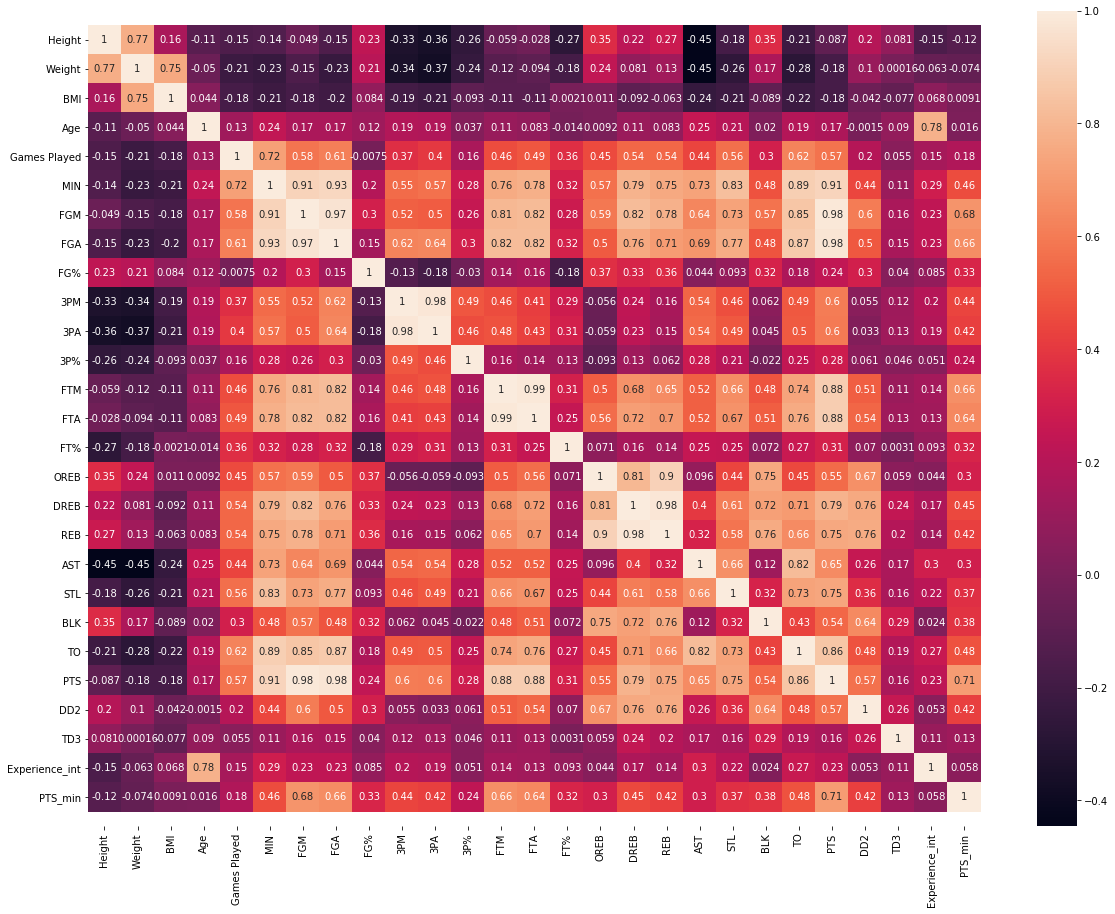

In [17]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(wnba.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

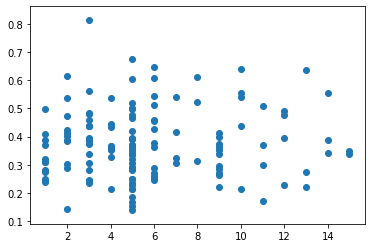

In [116]:
plt.scatter(wnba['Experience_int'], wnba['PTS_min'])

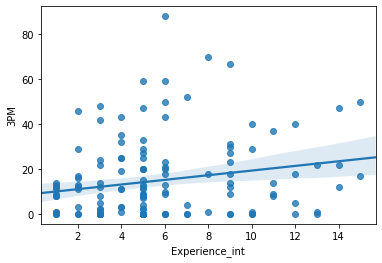

In [117]:
sns.regplot(x="Experience_int", y="3PM", data=wnba)

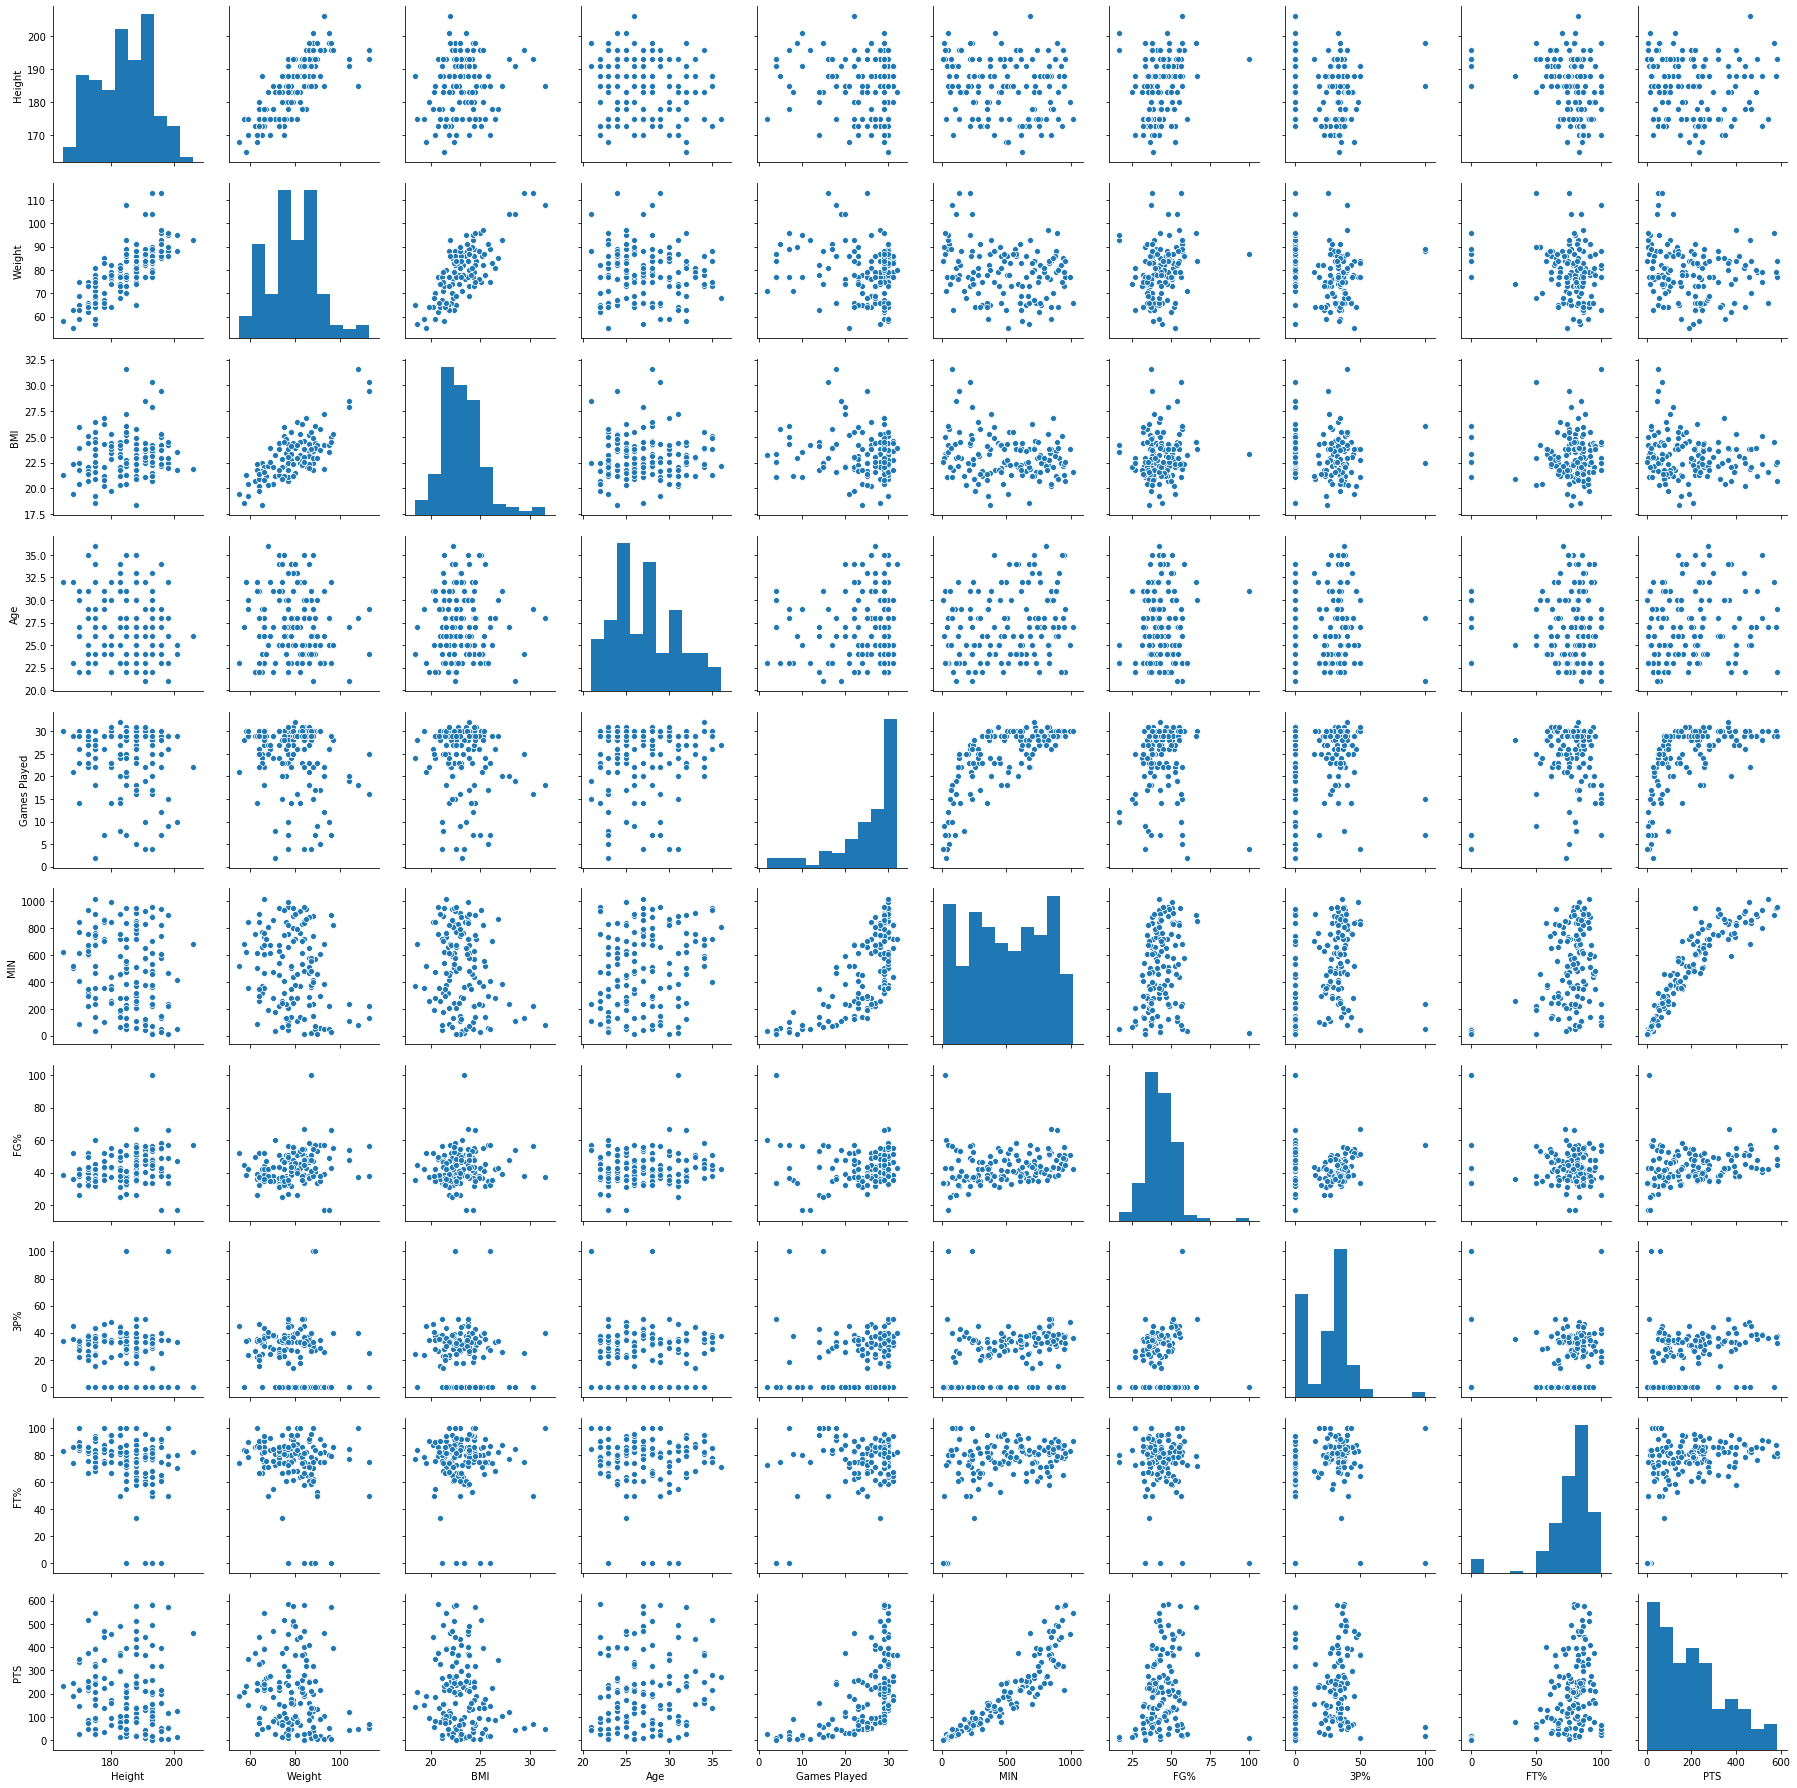

In [67]:
sns.pairplot(wnba[['Height','Weight', 'BMI', 'Age', 'Experience', 'Games Played', 'MIN','FG%', '3P%', 'FT%', 'PTS']])

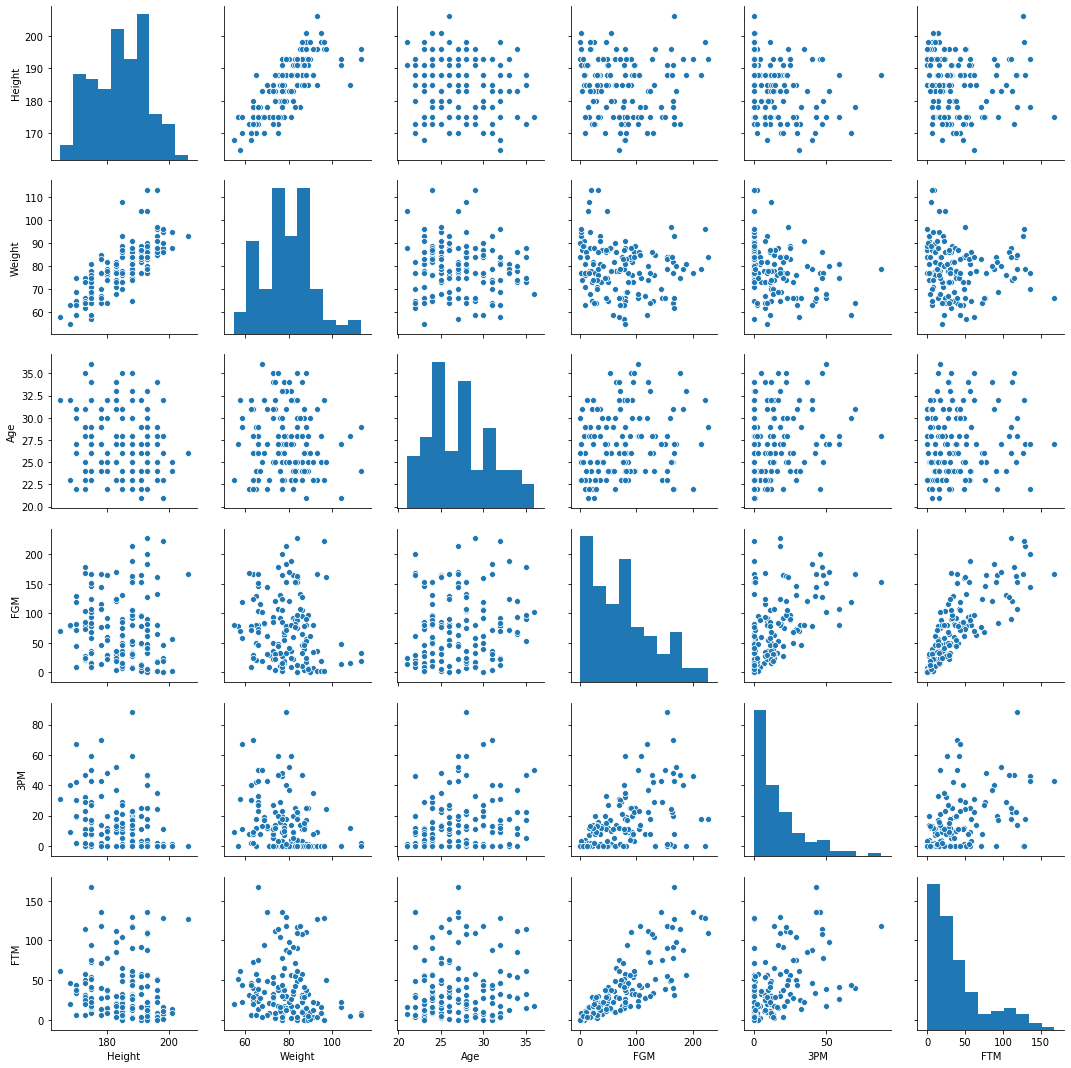

In [63]:
sns.pairplot(wnba[['Height', 'Weight', 'Age', 'FGM', '3PM', 'FTM']])

In [26]:
# Null hypothesis: average height of wnba players = average height women in USA (= 161.5 cm, source: wikipedia)
# https://en.wikipedia.org/wiki/Average_human_height_by_country
# Alternative hypothesis: average height of wnba players > average height women in USA

wnba_height_mean = np.mean(wnba['Height'])
print(f'The average height of a wnba player is: {wnba_height_mean} cm.')

stat, pval = stats.ttest_1samp(wnba['Height'], 161.5)
print(f'The p-value is: {pval/2}.')
print('With 95% certainty we can say that the average heigth of players in the wnba is not equal to the average height of women in the US.')

stats.t.interval(0.95, len(wnba['Height'])-1, loc=np.mean(wnba['Height']), scale=stats.sem(wnba['Height']))

The average height of a wnba player is: 184.61267605633802 cm.
The p-value is: 2.915461876252542e-66.
With 95% certainty we can say that the average heigth of players in the wnba is not equal to the average height of women in the US


(183.16965313370414, 186.0556989789719)

In [18]:
# Null hypothesis: average weight of wnba players = average weight women in USA (= 76.4 kg, source: wikipedia)
# https://en.wikipedia.org/wiki/Human_body_weight
# Alternative hypothesis: average weight of wnba players > average weight women in USA

wnba_weight_mean = np.mean(wnba['Age'])
print(f'The average weight of a wnba player is: {wnba_weight_mean} kg.')

stat, pval = stats.ttest_1samp(wnba['Age'], 76.4)
print(f'The p-value is: {pval/2}.')
print('With 95% certainty we can say that the average weigth of players in the wnba is not equal to the average weight of women in the US.')

stats.t.interval(0.95, len(wnba['Age'])-1, loc=np.mean(wnba['Age']), scale=stats.sem(wnba['Age']))

The average weight of a wnba player is: 27.112676056338028 kg.
The p-value is: 1.0905592358776388e-161.
With 95% certainty we can say that the average weigth of players in the wnba is not equal to the average weight of women in the US.


(26.504289457752858, 27.721062654923198)

In [58]:
# Null hypothesis: average bmi of wnba players = average bmi women in USA (= 28.8, source: wikipedia)
# https://en.wikipedia.org/wiki/List_of_countries_by_body_mass_index
# Alternative hypothesis: average bmi of wnba players != average bmi women in USA

wnba_bmi_mean = np.mean(wnba['BMI'])
print(f'The average bmi of a wnba player is: {wnba_bmi_mean}.')

stat, pval = stats.ttest_1samp(wnba['BMI'], 28.8)
print(f'The p-value is: {pval}.')
print('With 95% certainty we can say that the average bmi of players in the wnba is not equal to the average bmi of women in the US.')

stats.t.interval(0.95, len(wnba['BMI'])-1, loc=np.mean(wnba['BMI']), scale=stats.sem(wnba['BMI']))

The average bmi of a wnba player is: 23.091214227746466.
The p-value is: 7.164105298699877e-68.
With 95% certainty we can say that the average bmi of players in the wnba is not equal to the average bmi of women in the US.


(22.747188007076456, 23.435240448416476)